In [51]:
#Import the data for the temperature in the city of Madrid.
# Source: https://www.ncei.noaa.gov/cdo-web/ 

import pandas as pd
import matplotlib.pyplot as plt

# Import the Excel file and parse the "Date" column as datetime,
# setting it as the index.
data = pd.read_csv("Climate_info_monthly.csv",delimiter=';')

Select only the last two years of data to be abe to capture the trend and/or the seasonality .As it is daily data we take into consideration the last 730 days

In [60]:
data_subset  =data.iloc[:60,:]

data_subset.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-06,208.2,E,155.4,",E",...,4.3,",E",49.7,",,,E",23.4,",E",31.6,",,,E",15.1,",,,E"
1,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-07,531.2,E,323.0,",E",...,0.0,",E",0.5,"1,,,E",28.8,",E",37.4,",,,E",20.1,",,,E"
2,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-08,745.9,E,214.7,",E",...,0.0,",E",3.8,"1,,,E",25.3,",E",33.2,",,,E",17.3,",,,E"
3,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-09,801.4,E,55.5,",E",...,7.2,",E",10.9,",,,E",19.9,",E",27.3,",,,E",12.6,",,,E"
4,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-10,804.3,E,2.9,",E",...,95.1,",E",46.6,",,,E",15.4,",E",21.3,",,,E",9.4,",,,E"


# Null values identification

In [53]:
#Identify how many None values do we have in the two years of data that we selected for the analysis
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          847 non-null    object 
 1   NAME             847 non-null    object 
 2   LATITUDE         847 non-null    float64
 3   LONGITUDE        847 non-null    float64
 4   ELEVATION        847 non-null    float64
 5   DATE             847 non-null    object 
 6   CDSD             845 non-null    float64
 7   CDSD_ATTRIBUTES  803 non-null    object 
 8   CLDD             846 non-null    float64
 9   CLDD_ATTRIBUTES  846 non-null    object 
 10  DP01             839 non-null    float64
 11  DP01_ATTRIBUTES  839 non-null    object 
 12  DP10             839 non-null    float64
 13  DP10_ATTRIBUTES  839 non-null    object 
 14  DSND             10 non-null     float64
 15  DSND_ATTRIBUTES  10 non-null     object 
 16  DT00             846 non-null    float64
 17  DT00_ATTRIBUTES 

In [54]:
print(data['TAVG'].dtype)

float64


The results show that in the column of interest, that is the TAVG: average temperarature,
we have 78 days where we don't have the information for of the temperature

# None values treatment:
In order to solve the issues of the null values and considering the seasonality of the data, we consider that the best method
to fill in the null value is by interpolation taking the nearest no null value. In that way we can avoid biases or any negative influence of those 
inputed values when fitting a model.

In [55]:
data['TAVG'] = data['TAVG'].interpolate(method='nearest')

In [56]:
#Verification that there are not more null values in our variable of interest
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          847 non-null    object 
 1   NAME             847 non-null    object 
 2   LATITUDE         847 non-null    float64
 3   LONGITUDE        847 non-null    float64
 4   ELEVATION        847 non-null    float64
 5   DATE             847 non-null    object 
 6   CDSD             845 non-null    float64
 7   CDSD_ATTRIBUTES  803 non-null    object 
 8   CLDD             846 non-null    float64
 9   CLDD_ATTRIBUTES  846 non-null    object 
 10  DP01             839 non-null    float64
 11  DP01_ATTRIBUTES  839 non-null    object 
 12  DP10             839 non-null    float64
 13  DP10_ATTRIBUTES  839 non-null    object 
 14  DSND             10 non-null     float64
 15  DSND_ATTRIBUTES  10 non-null     object 
 16  DT00             846 non-null    float64
 17  DT00_ATTRIBUTES 

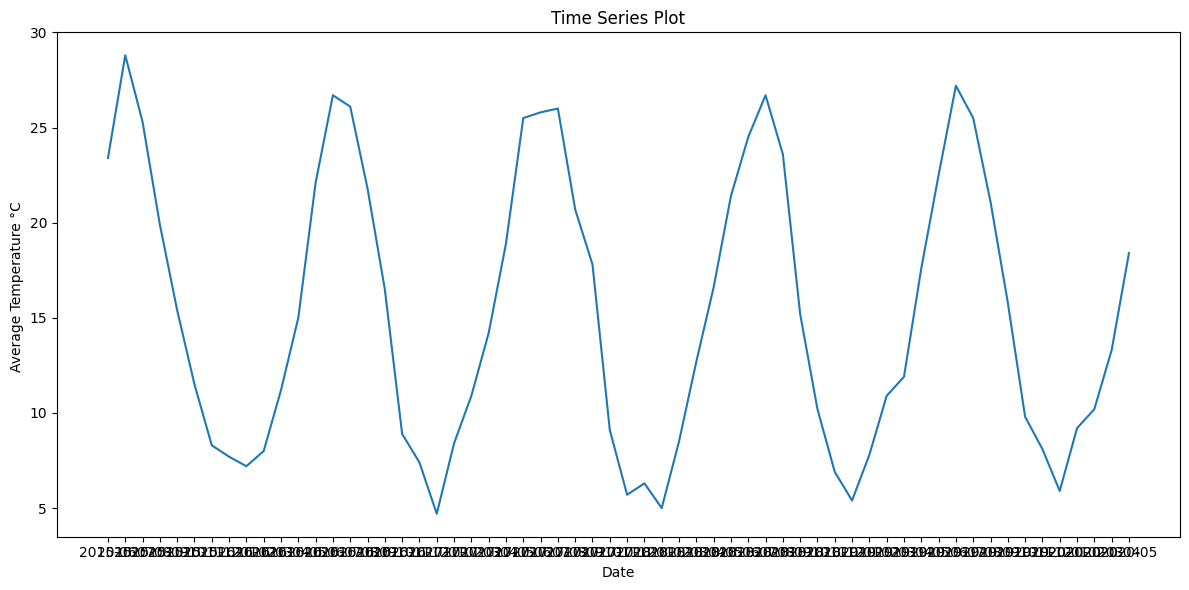

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-06,208.2,E,155.4,",E",...,4.3,",E",49.7,",,,E",23.4,",E",31.6,",,,E",15.1,",,,E"
1,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-07,531.2,E,323.0,",E",...,0.0,",E",0.5,"1,,,E",28.8,",E",37.4,",,,E",20.1,",,,E"
2,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-08,745.9,E,214.7,",E",...,0.0,",E",3.8,"1,,,E",25.3,",E",33.2,",,,E",17.3,",,,E"
3,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-09,801.4,E,55.5,",E",...,7.2,",E",10.9,",,,E",19.9,",E",27.3,",,,E",12.6,",,,E"
4,SPE00120305,"MADRID TORREJON, SP",40.4831,-3.4503,611.0,2015-10,804.3,E,2.9,",E",...,95.1,",E",46.6,",,,E",15.4,",E",21.3,",,,E",9.4,",,,E"


In [58]:

# Plot the time series of the average temperature in Madrid

plt.figure(figsize=(12, 6))
plt.plot(data['DATE'].iloc[:60] ,data['TAVG'].iloc[:60])
plt.title(f"Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Average Temperature °C ")
plt.tight_layout()
plt.show()

data.head()


It is clear that there is a seasonality i the data every year / 365 days approximately, aditionally it seems to be
an increasing trend in the avg. temperature

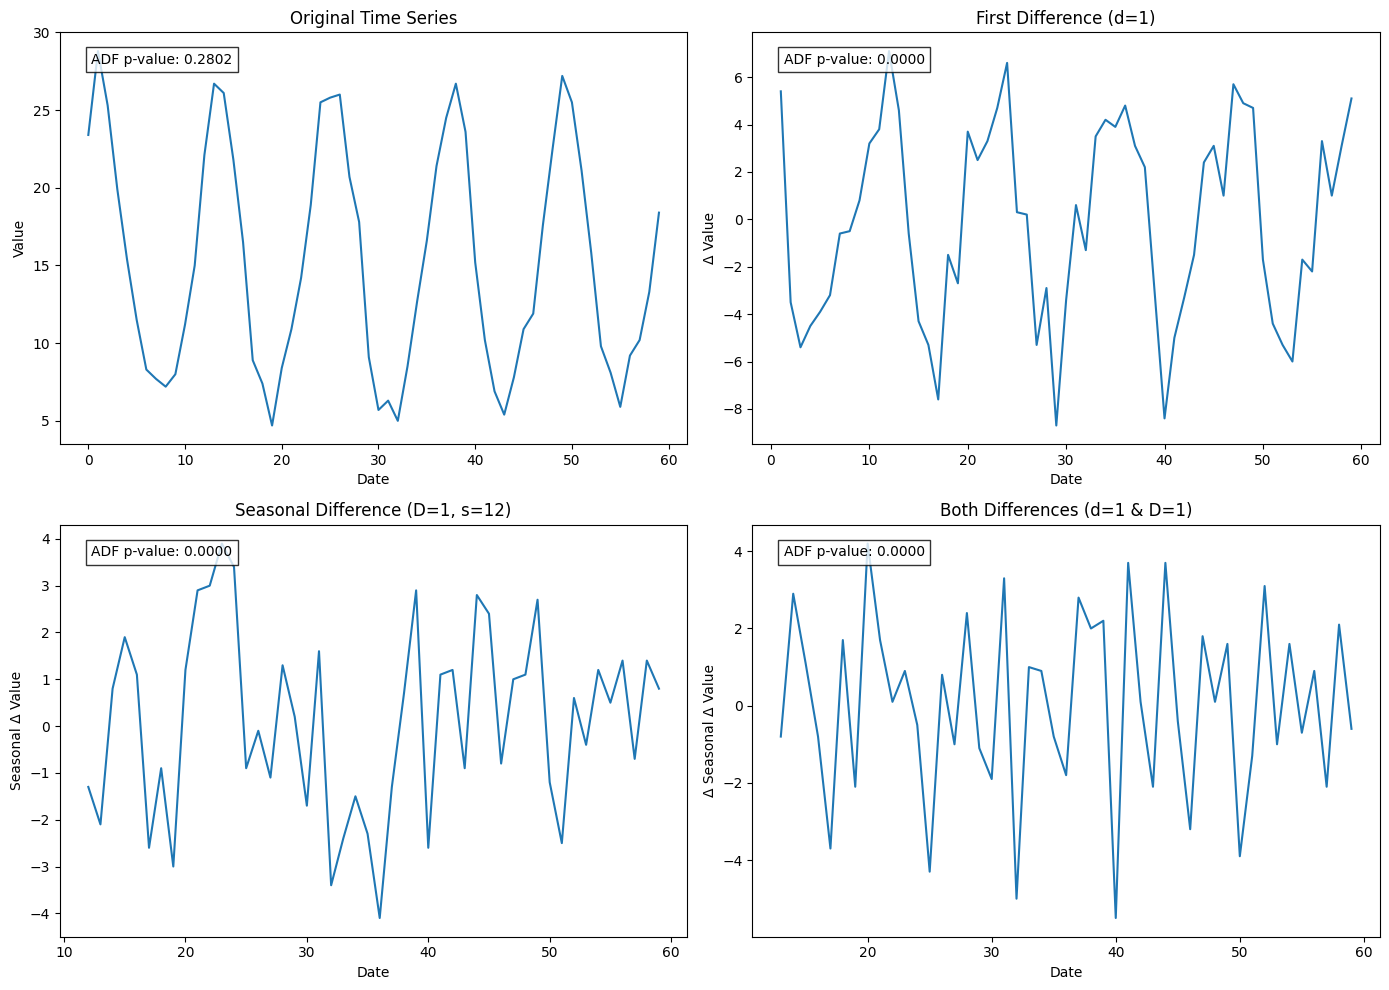

In [61]:
# We run the dicky Fuller test on the series to identify if the series is stationary

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assume the time series values are in the first column
series = data_subset['TAVG']

# We calculate the firs (non-seasonal) difference
diff_series = series.diff().dropna()

# The graph indicates that there is a yearly sesonality, considering that we have daily data
# we make the diffiratiation with a lag of 365 days.
seasonal_diff = series.diff(12).dropna()

# Both differences: apply first difference then seasonal difference
both_diff = diff_series.diff(12).dropna()

# Compute ADF test p-values for each series
adf_original = adfuller(series.dropna())
p_value_original = adf_original[1]

adf_diff = adfuller(diff_series)
p_value_diff = adf_diff[1]

adf_seasonal = adfuller(seasonal_diff)
p_value_seasonal = adf_seasonal[1]

adf_both = adfuller(both_diff)
p_value_both = adf_both[1]

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Top-Left: Original time series with ADF p-value annotation
axs[0, 0].plot(series, linestyle='-')
axs[0, 0].set_title("Original Time Series")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Value")
axs[0, 0].text(0.05, 0.95, f"ADF p-value: {p_value_original:.4f}",
               transform=axs[0, 0].transAxes,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.8))

# Top-Right: First Difference (non-seasonal) with ADF p-value annotation
axs[0, 1].plot(diff_series, linestyle='-')
axs[0, 1].set_title("First Difference (d=1)")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Δ Value")
axs[0, 1].text(0.05, 0.95, f"ADF p-value: {p_value_diff:.4f}",
               transform=axs[0, 1].transAxes,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.8))

# Bottom-Left: Seasonal Difference (assumed seasonal period s=12) with ADF p-value annotation
axs[1, 0].plot(seasonal_diff, linestyle='-')
axs[1, 0].set_title("Seasonal Difference (D=1, s=12)")
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("Seasonal Δ Value")
axs[1, 0].text(0.05, 0.95, f"ADF p-value: {p_value_seasonal:.4f}",
               transform=axs[1, 0].transAxes,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.8))

# Bottom-Right: Both Differences (non-seasonal then seasonal) with ADF p-value annotation
axs[1, 1].plot(both_diff,  linestyle='-')
axs[1, 1].set_title("Both Differences (d=1 & D=1)")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Δ Seasonal Δ Value")
axs[1, 1].text(0.05, 0.95, f"ADF p-value: {p_value_both:.4f}",
               transform=axs[1, 1].transAxes,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()




As shown in the result, the original series is a non-stationary series with a p-value of 0.54
For the rest, the ussing the first and seasonal differatiation seems equivalent, the p-value for 
te three combinations of only first diff., only seasonal diff, and both diffs get a a p-value of 0.0

This might indicate an indifference on what diff to use, further more graph is very simmilar between the three 
options so its not visual evidence that one its better than the other.

Seeing that there is a clear seasonlality and trend in the original series we decided to go for the series where we made both diff.

In order to identify what stationary series is better to use to fit a Seasonal Arima model we use made the ACF and PACF for each of the series. In that way we picked the one were the ACF shows a faster decrease to cero. 

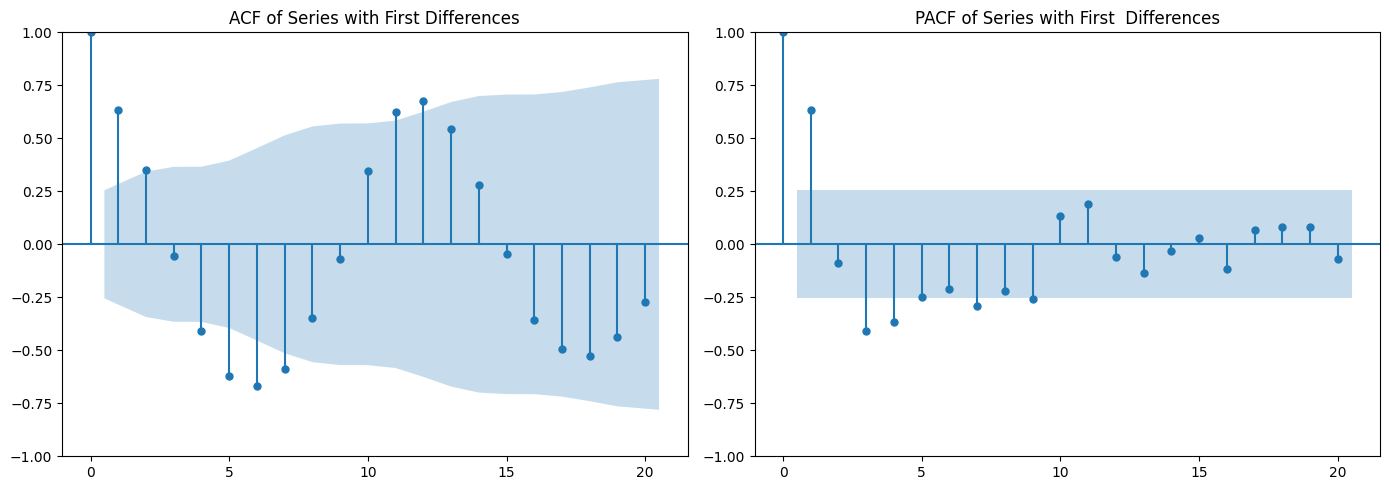

In [63]:
# Create ACF and PACF plots for the series with both differences
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# ACF Plot
sm.graphics.tsa.plot_acf(diff_series, lags=20, ax=axs[0])
axs[0].set_title("ACF of Series with First Differences")

# PACF Plot
sm.graphics.tsa.plot_pacf(diff_series, lags=20, ax=axs[1], method='ywm')
axs[1].set_title("PACF of Series with First  Differences")

plt.tight_layout()
plt.show()

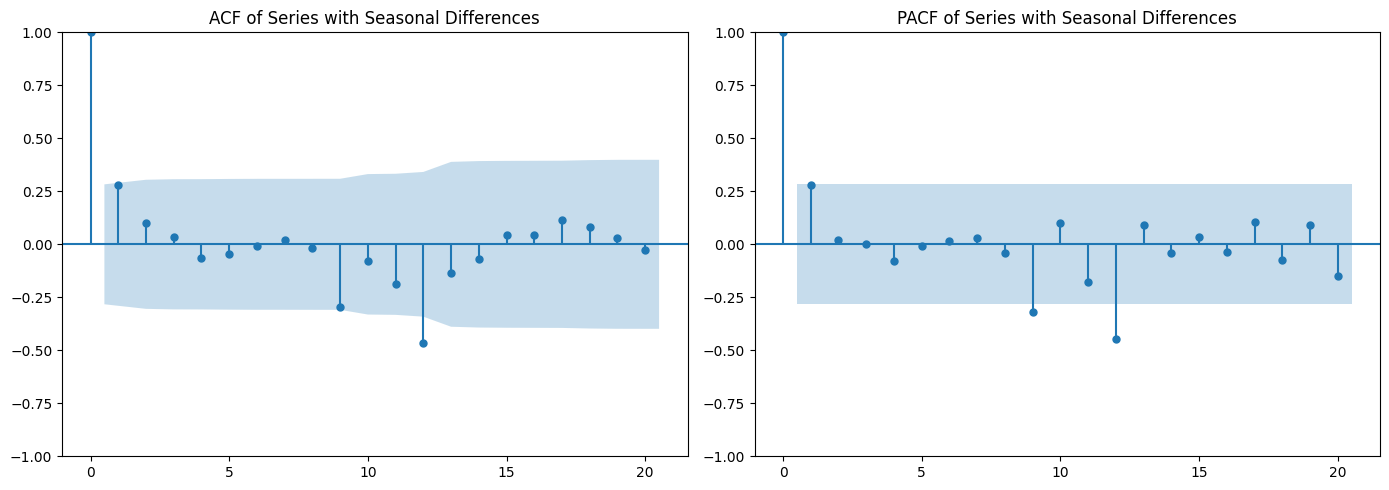

In [64]:
# Create ACF and PACF plots for the series with Seasonal differences
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# ACF Plot
sm.graphics.tsa.plot_acf(seasonal_diff, lags=20, ax=axs[0])
axs[0].set_title("ACF of Series with Seasonal Differences")

# PACF Plot
sm.graphics.tsa.plot_pacf(seasonal_diff, lags=20, ax=axs[1], method='ywm')
axs[1].set_title("PACF of Series with Seasonal Differences")

plt.tight_layout()
plt.show()

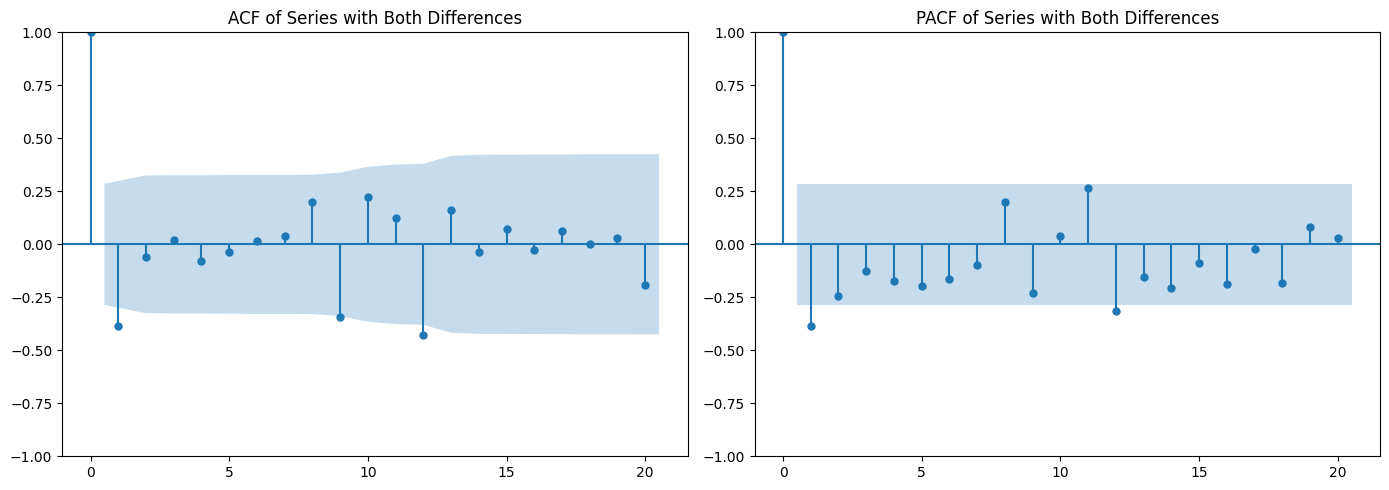

In [65]:
# Create ACF and PACF plots for the series with First difference
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# ACF Plot
sm.graphics.tsa.plot_acf(both_diff, lags=20, ax=axs[0])
axs[0].set_title("ACF of Series with Both Differences")

# PACF Plot
sm.graphics.tsa.plot_pacf(both_diff, lags=20, ax=axs[1], method='ywm')
axs[1].set_title("PACF of Series with Both Differences")

plt.tight_layout()
plt.show()

In [89]:
import itertools
import numpy as np 

# Define the grid for non-seasonal parameters p, q and seasonal parameters P, Q
p_values = range(3)
q_values = range(3)
P_values = range(3)
Q_values = range(3)

# Fixed differencing orders and seasonal period
d = 1
D = 1
s = 12

# List to store results
results_list = []

# Grid search over all combinations of p, q, P, Q
for p, q, P, Q in itertools.product(p_values, q_values, P_values, Q_values):
    order = (p, d, q)
    seasonal_order = (P, D, Q, s)
    try:
        model = sm.tsa.SARIMAX(series, order=order, seasonal_order=seasonal_order)
        result = model.fit(disp=False)
        results_list.append({
            'p': p, 'd': d, 'q': q,
            'P': P, 'D': D, 'Q': Q, 's': s,
            'AIC': result.aic, 'BIC': result.bic
        })
    except Exception as e:
        # In case the model fails to fit, record NaN for AIC and BIC.
        results_list.append({
            'p': p, 'd': d, 'q': q,
            'P': P, 'D': D, 'Q': Q, 's': s,
            'AIC': np.nan, 'BIC': np.nan
        })

# Convert the list of results into a DataFrame and sort by BIC (or AIC)
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by='BIC')
print(results_df)

c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too f

    p  d  q  P  D  Q   s         AIC         BIC
10  0  1  1  0  1  1  12  187.719069  193.269512
37  1  1  1  0  1  1  12  186.811291  194.211882
19  0  1  2  0  1  1  12  187.242818  194.643408
11  0  1  1  0  1  2  12  188.061412  195.462003
13  0  1  1  1  1  1  12  188.152511  195.553101
12  0  1  1  1  1  0  12  191.556408  197.106851
38  1  1  1  0  1  2  12  187.907808  197.158546
40  1  1  1  1  1  1  12  188.036099  197.286837
20  0  1  2  0  1  2  12  188.183465  197.434203
22  0  1  2  1  1  1  12  188.350266  197.601004
15  0  1  1  2  1  0  12  190.254905  197.655495
64  2  1  1  0  1  1  12  188.784841  198.035579
46  1  1  2  0  1  1  12  188.794229  198.044967
39  1  1  1  1  1  0  12  191.586842  198.987432
42  1  1  1  2  1  0  12  189.760520  199.011258
24  0  1  2  2  1  0  12  189.871567  199.122305
14  0  1  1  1  1  2  12  190.044503  199.295241
21  0  1  2  1  1  0  12  192.064092  199.464683
16  0  1  1  2  1  1  12  190.618154  199.868892
28  1  1  0  0  1  1

In [90]:
# Find the row with the minimum AIC
best_aic_row = results_df.loc[results_df['AIC'].idxmin()]
# Find the row with the minimum BIC
best_bic_row = results_df.loc[results_df['BIC'].idxmin()]

print("Model with the lowest AIC:")
print(best_aic_row)

print("\nModel with the lowest BIC:")
print(best_bic_row)

Model with the lowest AIC:
p        1.000000
d        1.000000
q        1.000000
P        0.000000
D        1.000000
Q        1.000000
s       12.000000
AIC    186.811291
BIC    194.211882
Name: 37, dtype: float64

Model with the lowest BIC:
p        0.000000
d        1.000000
q        1.000000
P        0.000000
D        1.000000
Q        1.000000
s       12.000000
AIC    187.719069
BIC    193.269512
Name: 10, dtype: float64


In [91]:
# Extract parameters for the best model
p = int(best_bic_row['p'])
d = int(best_bic_row['d'])
q = int(best_bic_row['q'])
P = int(best_bic_row['P'])
D = int(best_bic_row['D'])
Q = int(best_bic_row['Q'])
s = int(best_bic_row['s'])

# Refit the best SARIMA model on the series
best_model = sm.tsa.SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, s))
best_result = best_model.fit(disp=False)

# Print the model summary to the console
print(best_result.summary())


c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                               TAVG   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -90.860
Date:                            Thu, 04 Dec 2025   AIC                            187.719
Time:                                    14:03:33   BIC                            193.270
Sample:                                         0   HQIC                           189.808
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7944      0.099     -8.027      0.000      -0.988      -0.600
ma.S.L12      -0.9970     56.845   

In [93]:
# Extract parameters for the best model
p = int(best_aic_row['p'])
d = int(best_aic_row['d'])
q = int(best_aic_row['q'])
P = int(best_aic_row['P'])
D = int(best_aic_row['D'])
Q = int(best_aic_row['Q'])
s = int(best_aic_row['s'])

# Refit the best SARIMA model on the series
best_model = sm.tsa.SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, s))
best_result = best_model.fit(disp=False)

# Print the model summary to the console
print(best_result.summary())

c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                               TAVG   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -89.406
Date:                            Thu, 04 Dec 2025   AIC                            186.811
Time:                                    14:03:54   BIC                            194.212
Sample:                                         0   HQIC                           189.596
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2745      0.165      1.660      0.097      -0.050       0.599
ma.L1         -0.9993     17.463   

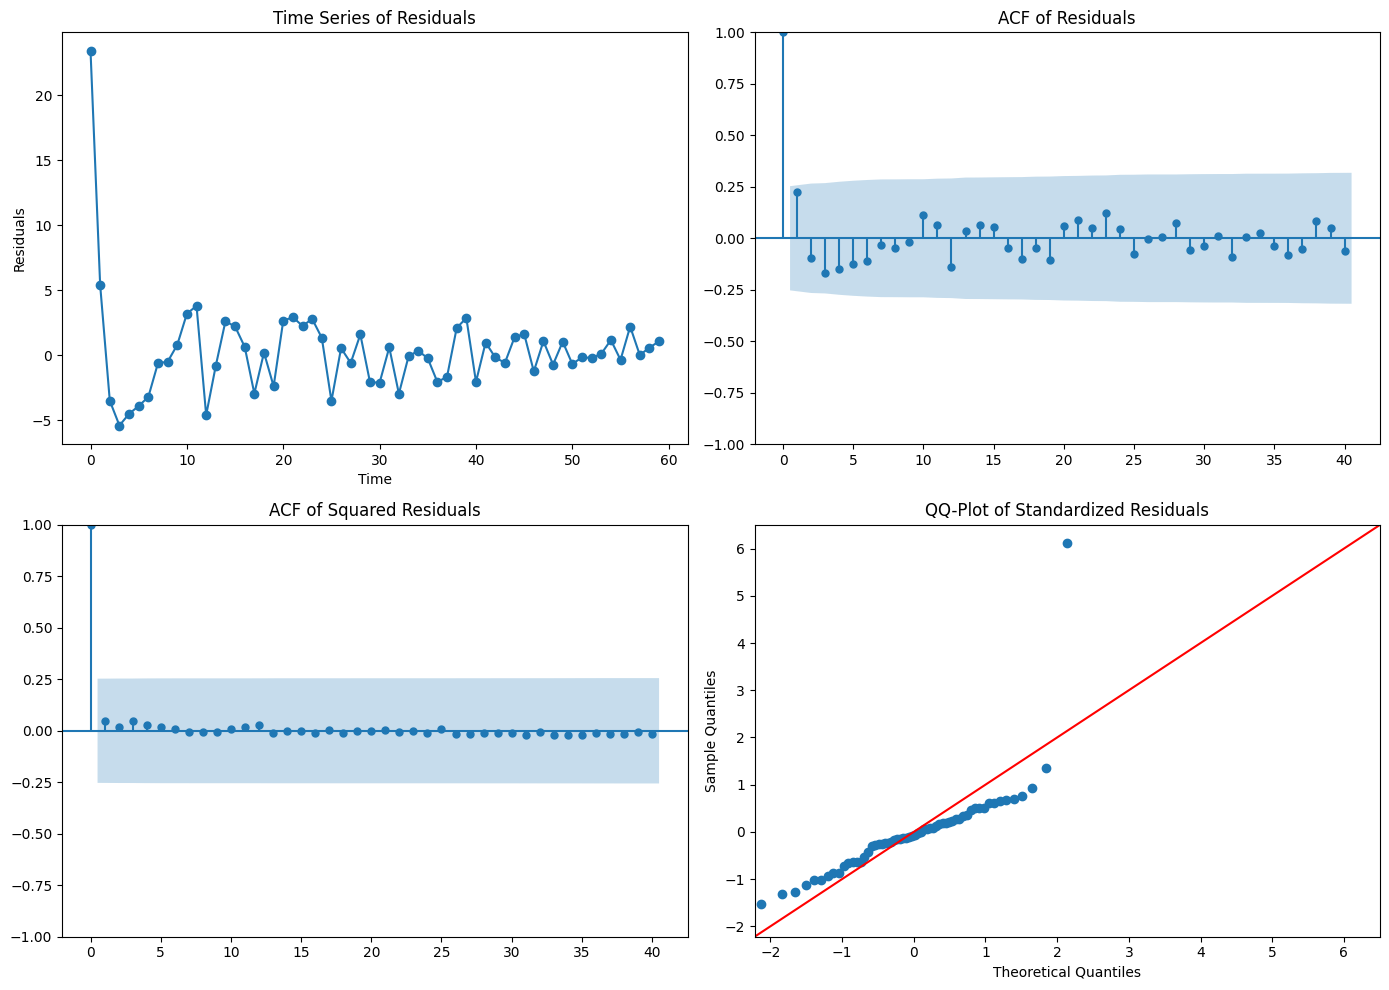

In [94]:
# Assuming 'best_result' is your fitted model from which we extract residuals.
resid = best_result.resid
resid_sq = resid ** 2

# Standardize the residuals for the QQ-plot.
resid_std = (resid - resid.mean()) / resid.std()

# Create a 2x2 grid of diagnostic plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Top-Left: Time Series of Residuals
axs[0, 0].plot(resid, marker='o', linestyle='-')
axs[0, 0].set_title("Time Series of Residuals")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Residuals")

# Top-Right: ACF of Residuals
sm.graphics.tsa.plot_acf(resid, lags=40, ax=axs[0, 1])
axs[0, 1].set_title("ACF of Residuals")

# Bottom-Left: ACF of Squared Residuals
sm.graphics.tsa.plot_acf(resid_sq, lags=40, ax=axs[1, 0])
axs[1, 0].set_title("ACF of Squared Residuals")

# Bottom-Right: QQ-Plot of Standardized Residuals
sm.qqplot(resid_std, line='45', ax=axs[1, 1])
axs[1, 1].set_title("QQ-Plot of Standardized Residuals")

plt.tight_layout()
plt.show()
